In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [42]:
df = pd.read_csv('Weights/Ques1/pm2.5.csv')

In [43]:
df.shape

(43824, 13)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43824 entries, 0 to 43823
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   No      43824 non-null  int64  
 1   year    43824 non-null  int64  
 2   month   43824 non-null  int64  
 3   day     43824 non-null  int64  
 4   hour    43824 non-null  int64  
 5   pm2.5   41757 non-null  float64
 6   DEWP    43824 non-null  int64  
 7   TEMP    43824 non-null  float64
 8   PRES    43824 non-null  float64
 9   cbwd    43824 non-null  object 
 10  Iws     43824 non-null  float64
 11  Is      43824 non-null  int64  
 12  Ir      43824 non-null  int64  
dtypes: float64(4), int64(8), object(1)
memory usage: 4.3+ MB


In [45]:
df.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0


In [46]:
df.drop(["No"], axis=1, inplace=True)

In [47]:
df.head()

,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0


In [48]:
df.shape

(43824, 12)

In [49]:
df['pm2.5'].isna().sum()

2067

In [50]:
df.dropna(inplace=True)

In [51]:
df.shape

(41757, 12)

In [52]:
df.head()

,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
24,2010,1,2,0,129.0,-16,-4.0,1020.0,SE,1.79,0,0
25,2010,1,2,1,148.0,-15,-4.0,1020.0,SE,2.68,0,0
26,2010,1,2,2,159.0,-11,-5.0,1021.0,SE,3.57,0,0
27,2010,1,2,3,181.0,-7,-5.0,1022.0,SE,5.36,1,0
28,2010,1,2,4,138.0,-7,-5.0,1022.0,SE,6.25,2,0


In [53]:
df['cbwd'].value_counts()

SE    14573
NW    13484
cv     8944
NE     4756
Name: cbwd, dtype: int64

In [54]:
def encodeCBWD(val):
    if val == 'SE':
        return 1
    elif val == 'NW':
        return 2
    elif val == 'NE':
        return 3
    return 4

In [55]:
df['cbwd'] = df['cbwd'].apply(encodeCBWD)

In [56]:
df.shape

(41757, 12)

In [57]:
df.head()

,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
24,2010,1,2,0,129.0,-16,-4.0,1020.0,1,1.79,0,0
25,2010,1,2,1,148.0,-15,-4.0,1020.0,1,2.68,0,0
26,2010,1,2,2,159.0,-11,-5.0,1021.0,1,3.57,0,0
27,2010,1,2,3,181.0,-7,-5.0,1022.0,1,5.36,1,0
28,2010,1,2,4,138.0,-7,-5.0,1022.0,1,6.25,2,0


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41757 entries, 24 to 43823
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    41757 non-null  int64  
 1   month   41757 non-null  int64  
 2   day     41757 non-null  int64  
 3   hour    41757 non-null  int64  
 4   pm2.5   41757 non-null  float64
 5   DEWP    41757 non-null  int64  
 6   TEMP    41757 non-null  float64
 7   PRES    41757 non-null  float64
 8   cbwd    41757 non-null  int64  
 9   Iws     41757 non-null  float64
 10  Is      41757 non-null  int64  
 11  Ir      41757 non-null  int64  
dtypes: float64(4), int64(8)
memory usage: 4.1 MB


In [59]:
df.describe()

,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
count,41757.000000,41757.000000,41757.000000,41757.000000,41757.000000,41757.000000,41757.000000,41757.000000,41757.000000,41757.000000,41757.000000,41757.000000
mean,2012.042771,6.513758,15.685514,11.502311,98.613215,1.750174,12.401561,1016.442896,2.193285,23.866747,0.055344,0.194866
std,1.415311,3.454199,8.785539,6.924848,92.050387,14.433658,12.175215,10.300733,1.132400,49.617495,0.778875,1.418165
min,2010.000000,1.000000,1.000000,0.000000,0.000000,-40.000000,-19.000000,991.000000,1.000000,0.450000,0.000000,0.000000
25%,2011.000000,4.000000,8.000000,5.000000,29.000000,-10.000000,2.000000,1008.000000,1.000000,1.790000,0.000000,0.000000
50%,2012.000000,7.000000,16.000000,12.000000,72.000000,2.000000,14.000000,1016.000000,2.000000,5.370000,0.000000,0.000000
75%,2013.000000,10.000000,23.000000,18.000000,137.000000,15.000000,23.000000,1025.000000,3.000000,21.910000,0.000000,0.000000
max,2014.000000,12.000000,31.000000,23.000000,994.000000,28.000000,42.000000,1046.000000,4.000000,565.490000,27.000000,36.000000


In [60]:
def train_test_split(df, trainSize = 0.8, testSize = 0.2, random_state = 42):
    validSize = 1 - trainSize - testSize
    indices = np.arange(df.shape[0])
    np.random.seed(random_state)
    np.random.shuffle(indices)
    trainData = df.iloc[indices[:int(trainSize*df.shape[0])]].reset_index(drop=True)
    validData = df.iloc[indices[int(trainSize*df.shape[0]):int((trainSize+validSize)*df.shape[0])]].reset_index(drop=True)
    testData = df.iloc[indices[int((trainSize+validSize)*df.shape[0]):]].reset_index(drop=True)
    if validSize == 0:
        return trainData, testData
    else:
        return trainData, validData, testData
trainData, validData, testData = train_test_split(df, trainSize = 0.70, testSize = 0.15, random_state = 0)

In [61]:
trainData.shape, validData.shape, testData.shape

((29229, 12), (6264, 12), (6264, 12))

In [62]:
trainY = trainData['month']
trainX = trainData.drop(['month'], axis=1)
validY = validData['month']
validX = validData.drop(['month'], axis=1)
testY = testData['month']
testX = testData.drop(['month'], axis=1)

In [63]:
testX.shape, trainX.shape, validX.shape, testY.shape, trainY.shape, validY.shape

((6264, 11), (29229, 11), (6264, 11), (6264,), (29229,), (6264,))

# part a

In [64]:
from sklearn.tree import DecisionTreeClassifier

In [65]:
decisionTreeEntropy = DecisionTreeClassifier(criterion='entropy', random_state=0)
decisionTreeEntropy.fit(trainX, trainY)
print('train', decisionTreeEntropy.score(trainX, trainY))
print('valid', decisionTreeEntropy.score(validX, validY))
print('test', decisionTreeEntropy.score(testX, testY))

train 1.0
valid 0.8333333333333334
test 0.8271072796934866


In [66]:
decisionTreeEntropy = DecisionTreeClassifier(criterion='gini', random_state=0)
decisionTreeEntropy.fit(trainX, trainY)
print('train', decisionTreeEntropy.score(trainX, trainY))
print('valid', decisionTreeEntropy.score(validX, validY))
print('test', decisionTreeEntropy.score(testX, testY))

train 1.0
valid 0.8033205619412516
test 0.80970625798212


# part b

In [67]:
depths = [2, 4, 8, 10, 15, 30]

In [68]:
testingAcc = []
trainingAcc = []
validationAcc = []

In [69]:
for depth in depths:
    decisionTreeEntropy = DecisionTreeClassifier(criterion='entropy', max_depth=depth)
    decisionTreeEntropy.fit(trainX, trainY)
    trainingAcc.append(decisionTreeEntropy.score(trainX, trainY))
    validationAcc.append(decisionTreeEntropy.score(validX, validY))
    testingAcc.append(decisionTreeEntropy.score(testX, testY))

In [70]:
plt.style.use('seaborn')
plt.style.use('ggplot')
plt.style.use('dark_background')


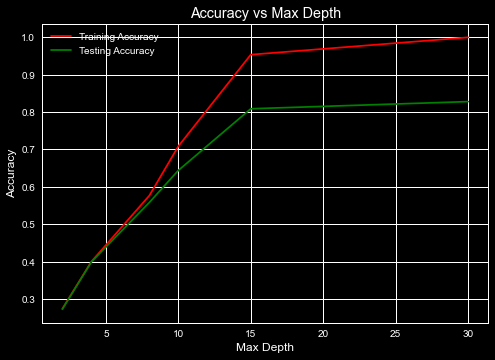

In [71]:
plt.plot(depths, trainingAcc, label='Training Accuracy', color='red')
plt.plot(depths, testingAcc, label='Testing Accuracy', color='green')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Max Depth')
plt.legend()
plt.savefig('Plots/Ques1/partb.png')
plt.show()

# part c

In [72]:
decisionTreeRF = DecisionTreeClassifier(criterion='entropy', max_depth=3)
predictions = []

for i in range(100):
    decisionTreeRF = DecisionTreeClassifier(criterion='entropy', max_depth=3)
    trainDataRF, testDataRF = train_test_split(trainData, trainSize = 0.5, testSize = 0.5, random_state = i+1)
    trainDataRF_X = trainDataRF.drop(['month'], axis=1)
    trainDataRF_y = trainDataRF['month']
    testDataRF_X = testDataRF.drop(['month'], axis=1)
    testDataRF_y = testDataRF['month']
    decisionTreeRF.fit(trainDataRF_X, trainDataRF_y)
    predictions.append(decisionTreeRF.predict(testX))


In [73]:
len(predictions), len(predictions[0])

(100, 6264)

In [74]:
pred = np.array(predictions)

In [75]:
pred.shape

(100, 6264)

In [76]:
y_ = []
for i in range(len(pred[0])):
    y_.append(np.argmax(np.bincount(pred[:,i])))

In [77]:
len(y_)

6264

In [78]:
def calcAccuracy(y_, y):
    return (y_ == y).sum()*100/len(y_)

In [79]:
calcAccuracy(y_, testY)

35.312899106002554

In [80]:
pred

array([[10,  9,  5, ...,  9,  7,  3],
       [10,  9,  5, ...,  9,  7,  3],
       [10,  9,  5, ...,  9,  7,  3],
       ...,
       [10,  9,  5, ...,  9,  7,  3],
       [10,  9,  5, ...,  9,  7,  3],
       [10,  9,  5, ...,  9,  7,  3]])

In [81]:
pred[0]

array([10,  9,  5, ...,  9,  7,  3])

In [215]:
pred.shape

(100, 6264)

In [216]:
len(y_)

6264

# part d

In [82]:
maxDepths = [4, 8, 10, 15, 20, 30]

In [83]:
trainPreds = {}
validPreds = {}
testPreds = {}
trainAccs = {}
validAccs = {}
testAccs = {}
for dep in maxDepths:
    trainPreds[dep] = []
    validPreds[dep] = []
    testPreds[dep] = []
    trainAccs[dep] = []
    validAccs[dep] = []
    testAccs[dep] = []
    for i in tqdm(range(100)):
        decisionTreeRF = DecisionTreeClassifier(
            criterion='entropy', max_depth=dep)
        trainDataRF, testDataRF = train_test_split(
            trainData, trainSize=0.5, testSize=0.5, random_state=i+1)
        trainDataRF_X = trainDataRF.drop(['month'], axis=1)
        trainDataRF_y = trainDataRF['month']
        testDataRF_X = testDataRF.drop(['month'], axis=1)
        testDataRF_y = testDataRF['month']
        decisionTreeRF.fit(trainDataRF_X, trainDataRF_y)
        trainPreds[dep].append(decisionTreeRF.predict(trainX))
        validPreds[dep].append(decisionTreeRF.predict(validX))
        testPreds[dep].append(decisionTreeRF.predict(testX))
        trainPred = np.array(trainPreds[dep])
        y_train = []
        for i in range(len(trainPred[0])):
            y_train.append(np.argmax(np.bincount(trainPred[:, i])))
        trainAccs[dep].append(calcAccuracy(y_train, trainY))
        testPred = np.array(testPreds[dep])
        y_test = []
        for i in range(len(testPred[0])):
            y_test.append(np.argmax(np.bincount(testPred[:, i])))
        testAccs[dep].append(calcAccuracy(y_test, testY))
        validPred = np.array(validPreds[dep])
        y_valid = []
        for i in range(len(validPred[0])):
            y_valid.append(np.argmax(np.bincount(validPred[:, i])))
        validAccs[dep].append(calcAccuracy(y_valid, validY))


100%|██████████| 100/100 [00:36<00:00,  2.73it/s]


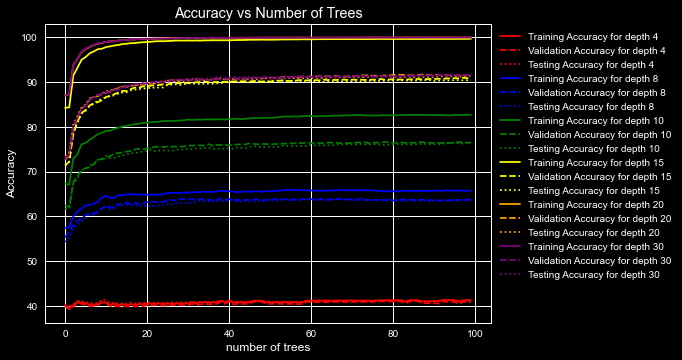

In [92]:
color = ['red', 'blue', 'green', 'yellow', 'orange', 'purple']
ctr = 0
for i in maxDepths:
    plt.plot(trainAccs[i], label='Training Accuracy for depth ' + str(i), color=color[ctr])
    plt.plot(validAccs[i], label='Validation Accuracy for depth ' + str(i), color=color[ctr], linestyle='dashed')
    plt.plot(testAccs[i], label='Testing Accuracy for depth ' + str(i), color=color[ctr], linestyle='dotted')
    ctr += 1
plt.xlabel('number of trees')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of Trees')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.savefig('Plots/Ques1/partd.png')
plt.show()

# part e

In [93]:
from sklearn.ensemble import AdaBoostClassifier

In [94]:
noOfEstimators = [4, 8, 10, 15, 20]

In [95]:
adaTrainAccs = []
adaTestAccs = []
adaValidAccs = []
for i in tqdm(range(len(noOfEstimators))):
    dtForAda = DecisionTreeClassifier(criterion='entropy')
    est = noOfEstimators[i]
    adaBoost = AdaBoostClassifier(base_estimator=dtForAda, n_estimators=est)
    adaBoost.fit(trainX, trainY)
    adaTrainAccs.append(adaBoost.score(trainX, trainY))
    adaTestAccs.append(adaBoost.score(testX, testY))
    adaValidAccs.append(adaBoost.score(validX, validY))


100%|██████████| 5/5 [00:01<00:00,  3.59it/s]


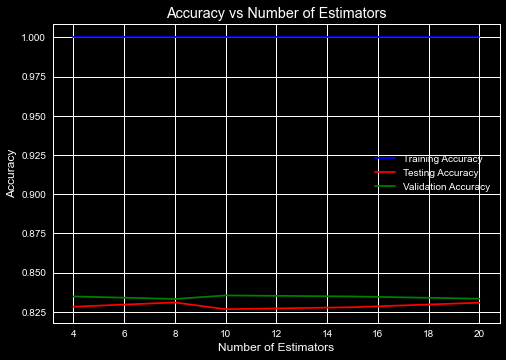

In [96]:
plt.plot(noOfEstimators, adaTrainAccs, label='Training Accuracy', color='blue')
plt.plot(noOfEstimators, adaTestAccs, label='Testing Accuracy', color='red')
plt.plot(noOfEstimators, adaValidAccs, label='Validation Accuracy', color='green')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of Estimators')
plt.legend()
plt.savefig('Plots/Ques1/parte.png')
plt.show()